In [37]:
#Credit to Group 17 (Nishant and Rion) for this idea

from skimage.filters import roberts,sobel,scharr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import h5py as h5
import cv2

In [38]:
#getting training images (downloaded from https://zenodo.org/record/1133969#.YWpD1BpByIs)
train_images_path = r'C:\Users\harsh\OneDrive\Desktop\ml cs460 project\craters\train_images.hdf5'
f = h5.File(train_images_path,'r')
input_images = f['input_images']
masks = f['target_masks']

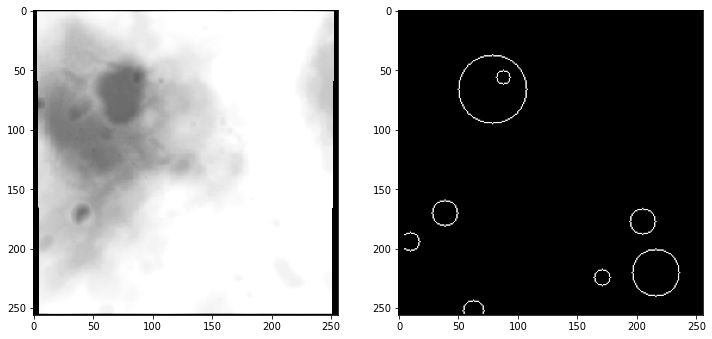

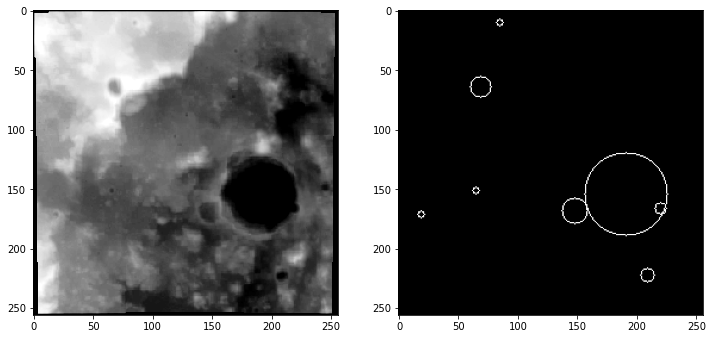

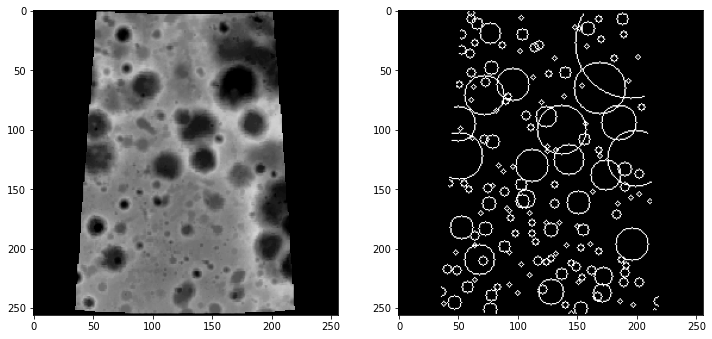

In [39]:
#going to train on pixels of 3 images only

#displaying the 3 training images and their masks (images 15,16,17)
for i in np.arange(15,18):
    fig = plt.figure(figsize=[12, 6])
    [ax1, ax2] = fig.subplots(1,2)
    ax1.imshow(f['input_images'][i][...], origin='upper', cmap='Greys_r', vmin=120, vmax=200)
    ax2.imshow(f['target_masks'][i][...], origin='upper', cmap='Greys_r')
    plt.show()

In [40]:
#creating pandas dataframe to store the pixel vals of the 3 images

df = pd.DataFrame()

im1 =  input_images[15]
im2 =  input_images[16]
im3 =  input_images[17]

dem1 = input_images[15].reshape(-1)
dem2 = input_images[16].reshape(-1)
dem3 = input_images[17].reshape(-1)
pixels = np.concatenate((dem1,dem2,dem3))

#first feature of data will be just the pixel vals
df['pixel_vals'] = pixels


In [41]:
#next generate Gabor Filters (32 to be exact)
#thanks to https://github.com/bnsreenu/python_for_microscopists/blob/master/061-Gabor_Filter_Banks.py
#https://www.youtube.com/watch?v=6yW31TT6-wA&list=RDCMUC34rW-HtPJulxr5wp2Xa04w&index=4&ab_channel=DigitalSreeni

num = 1  #To count numbers up in order to give Gabor features a label in the data frame
kernels = []  #kernel bank
for theta in range(2):   #Define number of thetas. Here only 2 theta values 0 and 1/4 . pi 
    theta = theta / 4. * np.pi
    for sigma in (1, 3):  #Sigma with values of 1 and 3
        for lamda in np.arange(0, np.pi, np.pi / 4):   #Range of wavelengths
            for gamma in (0.05, 0.5):   #Gamma values of 0.05 and 0.5
                           
                gabor_label = 'Gabor' + str(num)  #Label Gabor columns as Gabor1, Gabor2, etc.
                ksize=3
                kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, 0, ktype=cv2.CV_32F)    
                kernels.append(kernel)
                #Now filter the image and add values to a new column 
                fimg1 = cv2.filter2D(dem1, cv2.CV_8UC3, kernel)
                fimg2 = cv2.filter2D(dem2, cv2.CV_8UC3, kernel)
                fimg3 = cv2.filter2D(dem3, cv2.CV_8UC3, kernel)
                fimg = np.concatenate((fimg1,fimg2,fimg3))
                filtered_img = fimg.reshape(-1)
                df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
                print(gabor_label, ': theta=', theta, ': sigma=', sigma, ': lamda=', lamda, ': gamma=', gamma)
                num += 1  #Increment for gabor column label
                

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.0 : gamma= 0.05
Gabor2 : theta= 0.0 : sigma= 1 : lamda= 0.0 : gamma= 0.5
Gabor3 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor4 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor5 : theta= 0.0 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor6 : theta= 0.0 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor7 : theta= 0.0 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.05
Gabor8 : theta= 0.0 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.5
Gabor9 : theta= 0.0 : sigma= 3 : lamda= 0.0 : gamma= 0.05
Gabor10 : theta= 0.0 : sigma= 3 : lamda= 0.0 : gamma= 0.5
Gabor11 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor12 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor13 : theta= 0.0 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor14 : theta= 0.0 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor15 : theta= 0.0 : sigma= 3 : lamda= 2

In [70]:
# Canny edge
ec1 = cv2.Canny(im1,100,200)
ec2 = cv2.Canny(im2,100,200)
ec3 = cv2.Canny(im3,100,200)
ec = np.concatenate((ec1,ec2,ec3))
c_edges = ec.reshape(-1)
df['Canny Edges'] = c_edges

In [43]:
#Roberts
er1 = roberts(im1)
er2 = roberts(im2)
er3 = roberts(im3)
er = np.concatenate((er1,er2,er3))
r_edges = er.reshape(-1)
df['Roberts Edges'] = r_edges


In [44]:
#sobel
es1 = sobel(im1)
es2 = sobel(im2)
es3 = sobel(im3)
es = np.concatenate((er1,er2,er3))
s_edges = es.reshape(-1)
df['Sobel Edges'] = s_edges

In [45]:
#Scharr
eh1 = sobel(im1)
eh2 = sobel(im2)
eh3 = sobel(im3)
eh = np.concatenate((er1,er2,er3))
schrr_edges = eh.reshape(-1)
df['Scharr Edges'] = schrr_edges

In [48]:
#now that features are done, we will add the pixel labels from the masks
mask1 = masks[15]
mask2 = masks[16]
mask3 = masks[17]

y1 = mask1.reshape(-1)
y2 = mask2.reshape(-1)
y3 = mask3.reshape(-1)

y = np.concatenate((y1,y2,y3))
df['Labels'] = y

In [71]:
#splitting df into test and train
from sklearn.model_selection import train_test_split
Y = df['Labels'].values
X = df.drop(labels = ['Labels'],axis = 1)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state = 1)

In [72]:
#Random Forst Classifier
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn import metrics

forest = RF(n_estimators = 15,random_state = 1)
forest.fit(X_train,Y_train)
test_predictions = forest.predict(X_test)

#printing test accuracy
metrics.accuracy_score(Y_test,test_predictions)

0.9725344590814302

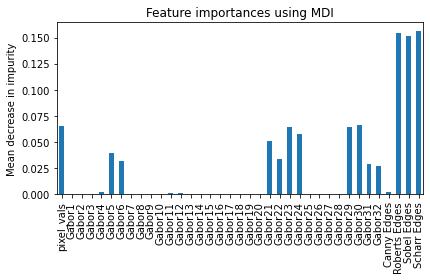

In [73]:
#selecting important features (https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html)
feature_names = list(X.columns)
forest_importances = pd.Series(forest.feature_importances_, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()


In [65]:
sorted_imps = forest_importances.sort_values(ascending = False)
sorted_imps

Scharr Edges     1.551859e-01
Sobel Edges      1.543339e-01
Roberts Edges    1.510178e-01
pixel_vals       6.690324e-02
Gabor30          6.580361e-02
Gabor29          6.558164e-02
Gabor23          6.506904e-02
Gabor24          5.450577e-02
Gabor21          5.078979e-02
Gabor5           3.816740e-02
Gabor6           3.417716e-02
Gabor22          3.352658e-02
Gabor31          3.007117e-02
Gabor32          2.953909e-02
Gabor4           1.668564e-03
Gabor12          1.597220e-03
Gabor11          1.375371e-03
Gabor3           5.028423e-04
Canny Edges      1.837674e-04
Gabor20          9.695747e-08
Gabor19          0.000000e+00
Gabor14          0.000000e+00
Gabor2           0.000000e+00
Gabor7           0.000000e+00
Gabor8           0.000000e+00
Gabor9           0.000000e+00
Gabor10          0.000000e+00
Gabor13          0.000000e+00
Gabor28          0.000000e+00
Gabor1           0.000000e+00
Gabor27          0.000000e+00
Gabor26          0.000000e+00
Gabor25          0.000000e+00
Gabor15   

In [92]:
#testing on new image 
test_df = pd.DataFrame()
unseen_image = input_images[20]

u_dem = unseen_image.reshape(-1)
u_sobel = sobel(unseen_image).reshape(-1)
u_scharr = sobel(unseen_image).reshape(-1)
u_robert = roberts(unseen_image).reshape(-1)
u_canny = cv2.Canny(unseen_image,100,200).reshape(-1)

test_df['pixel_vals'] = u_dem

t = 1
kernels = []  #kernel bank
for theta in range(2):   #Define number of thetas. Here only 2 theta values 0 and 1/4 . pi 
    theta = theta / 4. * np.pi
    for sigma in (1, 3):  #Sigma with values of 1 and 3
        for lamda in np.arange(0, np.pi, np.pi / 4):   #Range of wavelengths
            for gamma in (0.05, 0.5):   #Gamma values of 0.05 and 0.5
                           
                gabor_label = 'Gabor' + str(t)  #Label Gabor columns as Gabor1, Gabor2, etc.
                ksize=3
                kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, 0, ktype=cv2.CV_32F)    
                kernels.append(kernel)
                #Now filter the image and add values to a new column 
                fimg = cv2.filter2D(u_dem, cv2.CV_8UC3, kernel)
                filtered_img = fimg.reshape(-1)
                test_df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
                t += 1  #Increment for gabor column label
test_df['Canny Edges'] = u_canny
test_df['Roberts Edges'] = u_robert
test_df['Sobel Edges'] = u_sobel
test_df['Scharr Edges'] = u_scharr

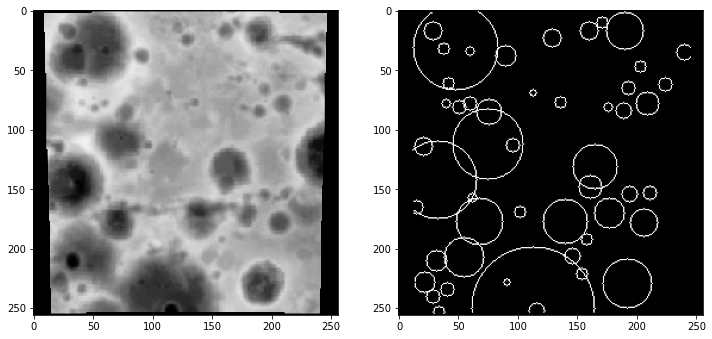

In [93]:
y_pred = model.predict(test_df)   
pred_image = y_pred.reshape((256,256))

#test image and its mask
fig = plt.figure(figsize=[12, 6])
[ax1, ax2] = fig.subplots(1,2)
ax1.imshow(f['input_images'][20][...], origin='upper', cmap='Greys_r', vmin=120, vmax=200)
ax2.imshow(f['target_masks'][20][...], origin='upper', cmap='Greys_r')
plt.show()

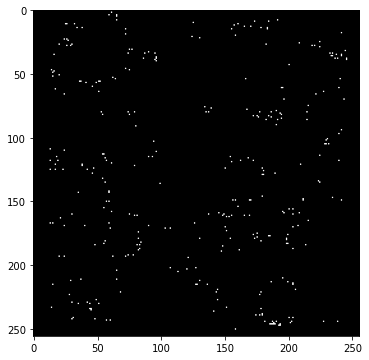

In [94]:
fig = plt.figure(figsize=[12, 6])
ax = fig.subplots(1,1)
ax.imshow(pred_image, origin='upper', cmap='Greys_r')
plt.show()

# Observations: 
1. The white dots above sort of resemble the craters in the mask, but it is very sparse
2. The model had a very good testing accuracy, but it doesn't seem to do very well when presented with a full unseen image.